Testing with bandwidth: 2.0 MHz
Bandwidth: 2.0 MHz - Current Mean: 0.126 A, Current Std Dev: 0.001 A
Bandwidth: 2.0 MHz - Voltage Mean: -1.562 V, Voltage Std Dev: 0.000 V
Testing with bandwidth: 6.5 MHz
Bandwidth: 6.5 MHz - Current Mean: 0.125 A, Current Std Dev: 0.001 A
Bandwidth: 6.5 MHz - Voltage Mean: -1.482 V, Voltage Std Dev: 0.000 V
Testing with bandwidth: 11.0 MHz
Bandwidth: 11.0 MHz - Current Mean: 0.124 A, Current Std Dev: 0.001 A
Bandwidth: 11.0 MHz - Voltage Mean: -1.392 V, Voltage Std Dev: 0.000 V
Testing with bandwidth: 15.5 MHz
Bandwidth: 15.5 MHz - Current Mean: 0.124 A, Current Std Dev: 0.001 A
Bandwidth: 15.5 MHz - Voltage Mean: -1.342 V, Voltage Std Dev: 0.000 V
Testing with bandwidth: 20.0 MHz
Bandwidth: 20.0 MHz - Current Mean: 0.123 A, Current Std Dev: 0.001 A
Bandwidth: 20.0 MHz - Voltage Mean: -1.287 V, Voltage Std Dev: 0.000 V


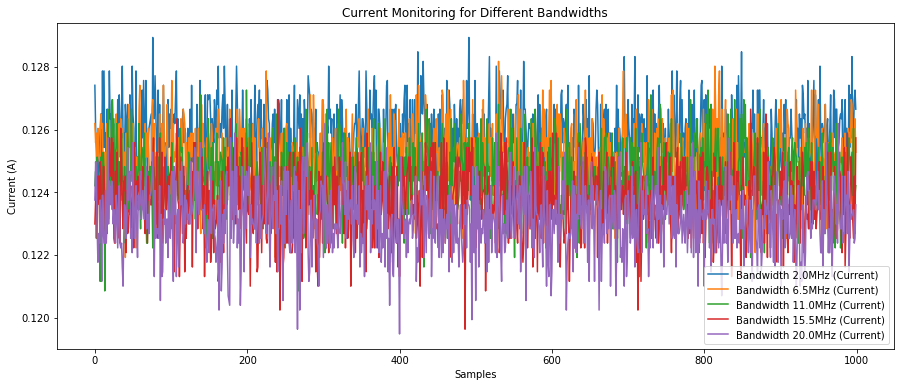

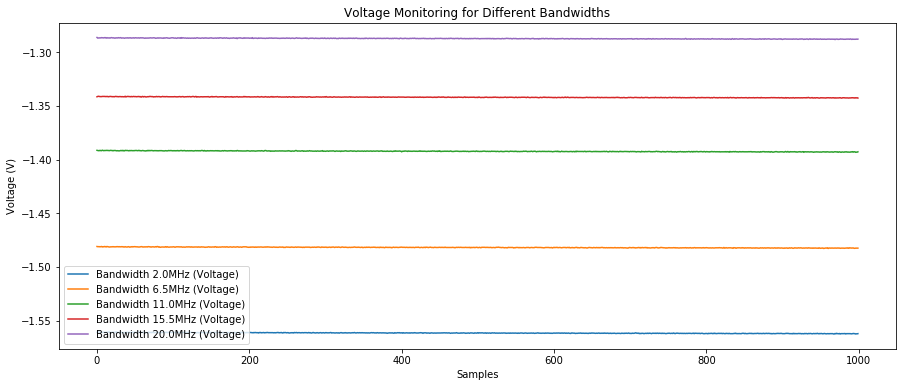

In [5]:
#Current, voltage zero plugOFF ai5

import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# Setup Noise Generator
rm = visa.ResourceManager()
gen = rm.open_resource('USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')
gen.write('*RST')
gen.write('OUTPut1:STATe On')
gen.write('FUNCtion NOIS')  # Set the generator to produce a noise waveform for each bandwidth

# Define bandwidth ranges
bandwidth_ranges = np.linspace(2e6, 20e6, 5)  # From 200 kHz to 20 MHz
current_df = pd.DataFrame()
voltage_df = pd.DataFrame()

with nidaqmx.Task() as send_current, nidaqmx.Task() as send_voltage:
    # Setup current channel
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")
    send_current.timing.cfg_samp_clk_timing(rate=50000)

    # Setup voltage channel
    send_voltage.ai_channels.add_ai_voltage_chan("Dev4/ai5")
    send_voltage.timing.cfg_samp_clk_timing(rate=100000)

    for bandwidth in bandwidth_ranges:
        print(f"Testing with bandwidth: {bandwidth/1e6} MHz")
        time.sleep(1)  # Allow some time for the system to stabilize

        # Read current and voltage data
        current_data = send_current.read(number_of_samples_per_channel=20000)
        voltage_data = send_voltage.read(number_of_samples_per_channel=20000)

        current_df[f'{bandwidth/1e6}MHz'] = current_data
        voltage_df[f'{bandwidth/1e6}MHz'] = voltage_data

        # Calculate statistics for current
        current_mean = np.mean(current_data)
        current_std = np.std(current_data)
        print(f'Bandwidth: {bandwidth/1e6} MHz - Current Mean: {current_mean:.3f} A, Current Std Dev: {current_std:.3f} A')

        # Calculate statistics for voltage
        voltage_mean = np.mean(voltage_data)
        voltage_std = np.std(voltage_data)
        print(f'Bandwidth: {bandwidth/1e6} MHz - Voltage Mean: {voltage_mean:.3f} V, Voltage Std Dev: {voltage_std:.3f} V')

gen.write('OUTPut1:STATe Off')
gen.close()

# Plotting for Current
plt.figure(figsize=(15, 6))
for column in current_df.columns:
    plt.plot(current_df[column], label=f'Bandwidth {column} (Current)')
plt.title('Current Monitoring for Different Bandwidths')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Current (A)')
plt.show()

# Plotting for Voltage
plt.figure(figsize=(15, 6))
for column in voltage_df.columns:
    plt.plot(voltage_df[column], label=f'Bandwidth {column} (Voltage)')
plt.title('Voltage Monitoring for Different Bandwidths')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.show()


Testing with bandwidth: 2.0 MHz
Bandwidth: 2.0 MHz - Current Mean: -0.010 A, Current Std Dev: 0.001 A
Bandwidth: 2.0 MHz - Voltage Mean: -0.045 V, Voltage Std Dev: 0.007 V
Testing with bandwidth: 6.5 MHz
Bandwidth: 6.5 MHz - Current Mean: -0.010 A, Current Std Dev: 0.001 A
Bandwidth: 6.5 MHz - Voltage Mean: -0.055 V, Voltage Std Dev: 0.007 V
Testing with bandwidth: 11.0 MHz
Bandwidth: 11.0 MHz - Current Mean: -0.010 A, Current Std Dev: 0.001 A
Bandwidth: 11.0 MHz - Voltage Mean: -0.058 V, Voltage Std Dev: 0.007 V
Testing with bandwidth: 15.5 MHz
Bandwidth: 15.5 MHz - Current Mean: -0.010 A, Current Std Dev: 0.001 A
Bandwidth: 15.5 MHz - Voltage Mean: -0.060 V, Voltage Std Dev: 0.007 V
Testing with bandwidth: 20.0 MHz
Bandwidth: 20.0 MHz - Current Mean: -0.010 A, Current Std Dev: 0.001 A
Bandwidth: 20.0 MHz - Voltage Mean: -0.062 V, Voltage Std Dev: 0.007 V


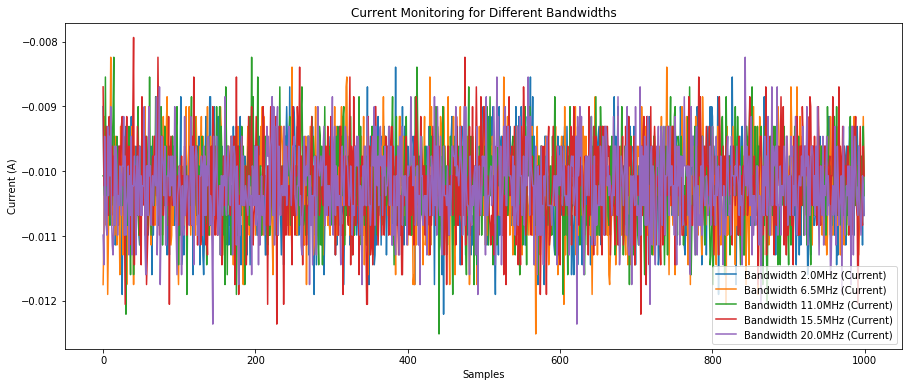

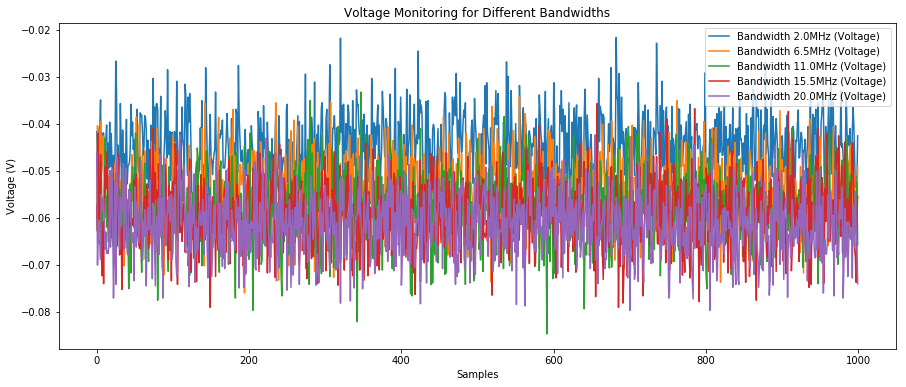

In [7]:
#Current, voltage zero plugIN ai5

import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# Setup Noise Generator
rm = visa.ResourceManager()
gen = rm.open_resource('USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')
gen.write('*RST')
gen.write('OUTPut1:STATe On')
gen.write('FUNCtion NOIS')  # Set the generator to produce a noise waveform for each bandwidth

# Define bandwidth ranges
bandwidth_ranges = np.linspace(2e6, 20e6, 5)  # From 200 kHz to 20 MHz
current_df = pd.DataFrame()
voltage_df = pd.DataFrame()

with nidaqmx.Task() as send_current, nidaqmx.Task() as send_voltage:
    # Setup current channel
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")
    send_current.timing.cfg_samp_clk_timing(rate=50000)

    # Setup voltage channel
    send_voltage.ai_channels.add_ai_voltage_chan("Dev4/ai5")
    send_voltage.timing.cfg_samp_clk_timing(rate=100000)

    for bandwidth in bandwidth_ranges:
        print(f"Testing with bandwidth: {bandwidth/1e6} MHz")
        time.sleep(1)  # Allow some time for the system to stabilize

        # Read current and voltage data
        current_data = send_current.read(number_of_samples_per_channel=20000)
        voltage_data = send_voltage.read(number_of_samples_per_channel=20000)

        current_df[f'{bandwidth/1e6}MHz'] = current_data
        voltage_df[f'{bandwidth/1e6}MHz'] = voltage_data

        # Calculate statistics for current
        current_mean = np.mean(current_data)
        current_std = np.std(current_data)
        print(f'Bandwidth: {bandwidth/1e6} MHz - Current Mean: {current_mean:.3f} A, Current Std Dev: {current_std:.3f} A')

        # Calculate statistics for voltage
        voltage_mean = np.mean(voltage_data)
        voltage_std = np.std(voltage_data)
        print(f'Bandwidth: {bandwidth/1e6} MHz - Voltage Mean: {voltage_mean:.3f} V, Voltage Std Dev: {voltage_std:.3f} V')

gen.write('OUTPut1:STATe Off')
gen.close()

# Plotting for Current
plt.figure(figsize=(15, 6))
for column in current_df.columns:
    plt.plot(current_df[column], label=f'Bandwidth {column} (Current)')
plt.title('Current Monitoring for Different Bandwidths')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Current (A)')
plt.show()

# Plotting for Voltage
plt.figure(figsize=(15, 6))
for column in voltage_df.columns:
    plt.plot(voltage_df[column], label=f'Bandwidth {column} (Voltage)')
plt.title('Voltage Monitoring for Different Bandwidths')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.show()


Testing with bandwidth: 2.0 MHz
Bandwidth: 2.0 MHz - Current Mean: -0.009 A, Current Std Dev: 0.007 A
Bandwidth: 2.0 MHz - Voltage Mean: -0.019 V, Voltage Std Dev: 0.003 V
Testing with bandwidth: 6.5 MHz
Bandwidth: 6.5 MHz - Current Mean: -0.009 A, Current Std Dev: 0.007 A
Bandwidth: 6.5 MHz - Voltage Mean: -0.019 V, Voltage Std Dev: 0.003 V
Testing with bandwidth: 11.0 MHz
Bandwidth: 11.0 MHz - Current Mean: -0.009 A, Current Std Dev: 0.007 A
Bandwidth: 11.0 MHz - Voltage Mean: -0.019 V, Voltage Std Dev: 0.003 V
Testing with bandwidth: 15.5 MHz
Bandwidth: 15.5 MHz - Current Mean: -0.009 A, Current Std Dev: 0.007 A
Bandwidth: 15.5 MHz - Voltage Mean: -0.021 V, Voltage Std Dev: 0.003 V
Testing with bandwidth: 20.0 MHz
Bandwidth: 20.0 MHz - Current Mean: -0.009 A, Current Std Dev: 0.007 A
Bandwidth: 20.0 MHz - Voltage Mean: -0.021 V, Voltage Std Dev: 0.003 V


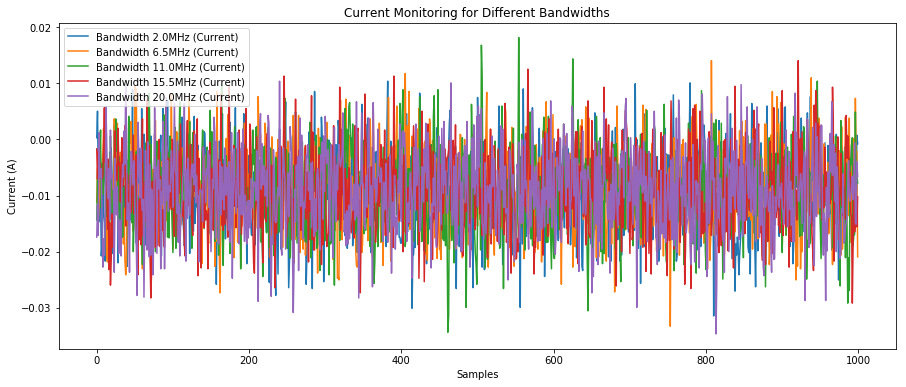

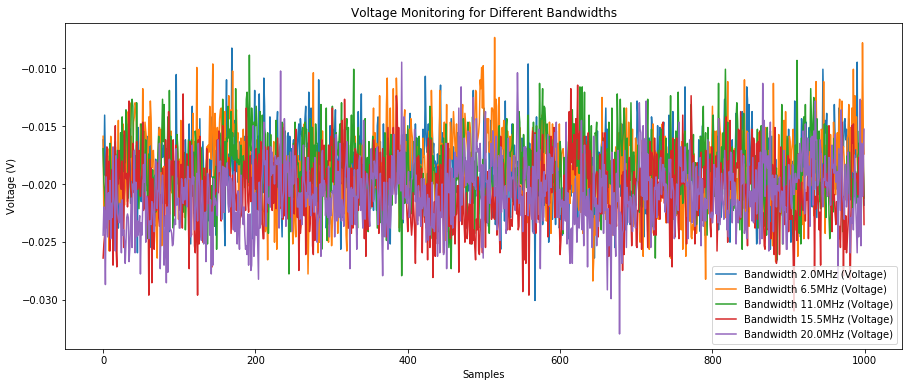

In [8]:
#Current, voltage TURNON plugIN ai5

import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# Setup Noise Generator
rm = visa.ResourceManager()
gen = rm.open_resource('USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')
gen.write('*RST')
gen.write('OUTPut1:STATe On')
gen.write('FUNCtion NOIS')  # Set the generator to produce a noise waveform for each bandwidth

# Define bandwidth ranges
bandwidth_ranges = np.linspace(2e6, 20e6, 5)  # From 200 kHz to 20 MHz
current_df = pd.DataFrame()
voltage_df = pd.DataFrame()

with nidaqmx.Task() as send_current, nidaqmx.Task() as send_voltage:
    # Setup current channel
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")
    send_current.timing.cfg_samp_clk_timing(rate=50000)

    # Setup voltage channel
    send_voltage.ai_channels.add_ai_voltage_chan("Dev4/ai5")
    send_voltage.timing.cfg_samp_clk_timing(rate=100000)

    for bandwidth in bandwidth_ranges:
        print(f"Testing with bandwidth: {bandwidth/1e6} MHz")
        time.sleep(1)  # Allow some time for the system to stabilize

        # Read current and voltage data
        current_data = send_current.read(number_of_samples_per_channel=20000)
        voltage_data = send_voltage.read(number_of_samples_per_channel=20000)

        current_df[f'{bandwidth/1e6}MHz'] = current_data
        voltage_df[f'{bandwidth/1e6}MHz'] = voltage_data

        # Calculate statistics for current
        current_mean = np.mean(current_data)
        current_std = np.std(current_data)
        print(f'Bandwidth: {bandwidth/1e6} MHz - Current Mean: {current_mean:.3f} A, Current Std Dev: {current_std:.3f} A')

        # Calculate statistics for voltage
        voltage_mean = np.mean(voltage_data)
        voltage_std = np.std(voltage_data)
        print(f'Bandwidth: {bandwidth/1e6} MHz - Voltage Mean: {voltage_mean:.3f} V, Voltage Std Dev: {voltage_std:.3f} V')

gen.write('OUTPut1:STATe Off')
gen.close()

# Plotting for Current
plt.figure(figsize=(15, 6))
for column in current_df.columns:
    plt.plot(current_df[column], label=f'Bandwidth {column} (Current)')
plt.title('Current Monitoring for Different Bandwidths')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Current (A)')
plt.show()

# Plotting for Voltage
plt.figure(figsize=(15, 6))
for column in voltage_df.columns:
    plt.plot(voltage_df[column], label=f'Bandwidth {column} (Voltage)')
plt.title('Voltage Monitoring for Different Bandwidths')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.show()


Testing with bandwidth: 2.0 MHz
Bandwidth: 2.0 MHz - Current Mean: -0.020 A, Current Std Dev: 0.021 A
Bandwidth: 2.0 MHz - Voltage Mean: 3.866 V, Voltage Std Dev: 0.445 V
Testing with bandwidth: 6.5 MHz
Bandwidth: 6.5 MHz - Current Mean: -0.022 A, Current Std Dev: 0.021 A
Bandwidth: 6.5 MHz - Voltage Mean: 3.987 V, Voltage Std Dev: 0.363 V
Testing with bandwidth: 11.0 MHz
Bandwidth: 11.0 MHz - Current Mean: -0.023 A, Current Std Dev: 0.021 A
Bandwidth: 11.0 MHz - Voltage Mean: 3.999 V, Voltage Std Dev: 0.421 V
Testing with bandwidth: 15.5 MHz
Bandwidth: 15.5 MHz - Current Mean: -0.022 A, Current Std Dev: 0.021 A
Bandwidth: 15.5 MHz - Voltage Mean: 4.025 V, Voltage Std Dev: 0.483 V
Testing with bandwidth: 20.0 MHz
Bandwidth: 20.0 MHz - Current Mean: -0.021 A, Current Std Dev: 0.021 A
Bandwidth: 20.0 MHz - Voltage Mean: 4.039 V, Voltage Std Dev: 0.417 V


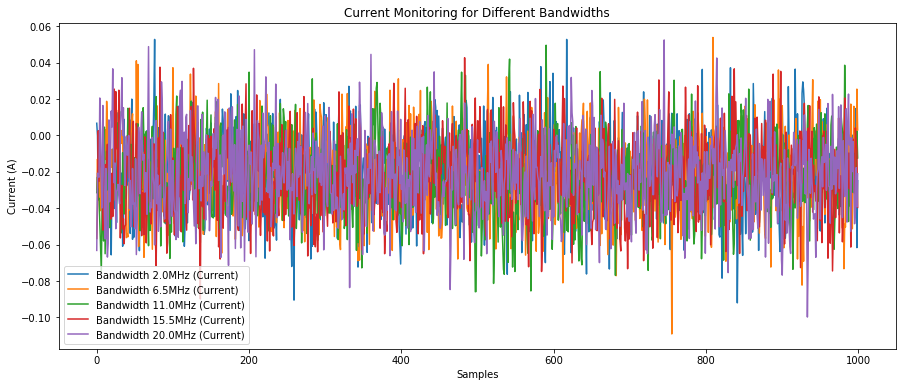

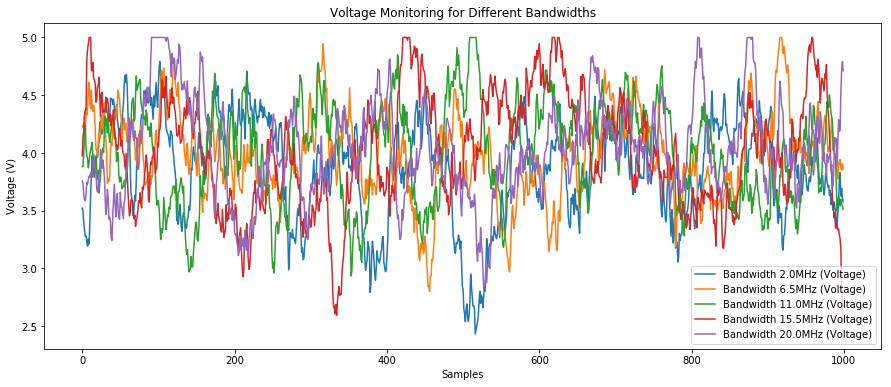

In [44]:
#Current, voltage TURNON plugIN ai5 connect to a resistor

import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# Setup Noise Generator
rm = visa.ResourceManager()
gen = rm.open_resource('USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')
gen.write('*RST')
gen.write('OUTPut1:STATe On')
gen.write('FUNCtion NOIS')  # Set the generator to produce a noise waveform for each bandwidth

# Define bandwidth ranges
bandwidth_ranges = np.linspace(2e6, 20e6, 5)  # From 200 kHz to 20 MHz
current_df = pd.DataFrame()
voltage_df = pd.DataFrame()

with nidaqmx.Task() as send_current, nidaqmx.Task() as send_voltage:
    # Setup current channel
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")
    send_current.timing.cfg_samp_clk_timing(rate=50000)

    # Setup voltage channel
    send_voltage.ai_channels.add_ai_voltage_chan("Dev4/ai5")
    send_voltage.timing.cfg_samp_clk_timing(rate=100000)

    for bandwidth in bandwidth_ranges:
        print(f"Testing with bandwidth: {bandwidth/1e6} MHz")
        time.sleep(1)  # Allow some time for the system to stabilize

        # Read current and voltage data
        current_data = send_current.read(number_of_samples_per_channel=20000)
        voltage_data = send_voltage.read(number_of_samples_per_channel=20000)

        current_df[f'{bandwidth/1e6}MHz'] = current_data
        voltage_df[f'{bandwidth/1e6}MHz'] = voltage_data

        # Calculate statistics for current
        current_mean = np.mean(current_data)
        current_std = np.std(current_data)
        print(f'Bandwidth: {bandwidth/1e6} MHz - Current Mean: {current_mean:.3f} A, Current Std Dev: {current_std:.3f} A')

        # Calculate statistics for voltage
        voltage_mean = np.mean(voltage_data)
        voltage_std = np.std(voltage_data)
        print(f'Bandwidth: {bandwidth/1e6} MHz - Voltage Mean: {voltage_mean:.3f} V, Voltage Std Dev: {voltage_std:.3f} V')

gen.write('OUTPut1:STATe Off')
gen.close()

# Plotting for Current
plt.figure(figsize=(15, 6))
for column in current_df.columns:
    plt.plot(current_df[column], label=f'Bandwidth {column} (Current)')
plt.title('Current Monitoring for Different Bandwidths')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Current (A)')
plt.show()

# Plotting for Voltage
plt.figure(figsize=(15, 6))
for column in voltage_df.columns:
    plt.plot(voltage_df[column], label=f'Bandwidth {column} (Voltage)')
plt.title('Voltage Monitoring for Different Bandwidths')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.show()


Testing with bandwidth: 2.0 MHz
Bandwidth: 2.0 MHz - Current Mean: -0.019 A, Current Std Dev: 0.021 A
Bandwidth: 2.0 MHz - Voltage Mean: 3.831 V, Voltage Std Dev: 0.447 V
Testing with bandwidth: 6.5 MHz
Bandwidth: 6.5 MHz - Current Mean: -0.023 A, Current Std Dev: 0.022 A
Bandwidth: 6.5 MHz - Voltage Mean: 3.899 V, Voltage Std Dev: 0.415 V
Testing with bandwidth: 11.0 MHz
Bandwidth: 11.0 MHz - Current Mean: -0.022 A, Current Std Dev: 0.021 A
Bandwidth: 11.0 MHz - Voltage Mean: 3.917 V, Voltage Std Dev: 0.428 V
Testing with bandwidth: 15.5 MHz
Bandwidth: 15.5 MHz - Current Mean: -0.021 A, Current Std Dev: 0.021 A
Bandwidth: 15.5 MHz - Voltage Mean: 3.917 V, Voltage Std Dev: 0.466 V
Testing with bandwidth: 20.0 MHz
Bandwidth: 20.0 MHz - Current Mean: -0.022 A, Current Std Dev: 0.021 A
Bandwidth: 20.0 MHz - Voltage Mean: 3.793 V, Voltage Std Dev: 0.493 V


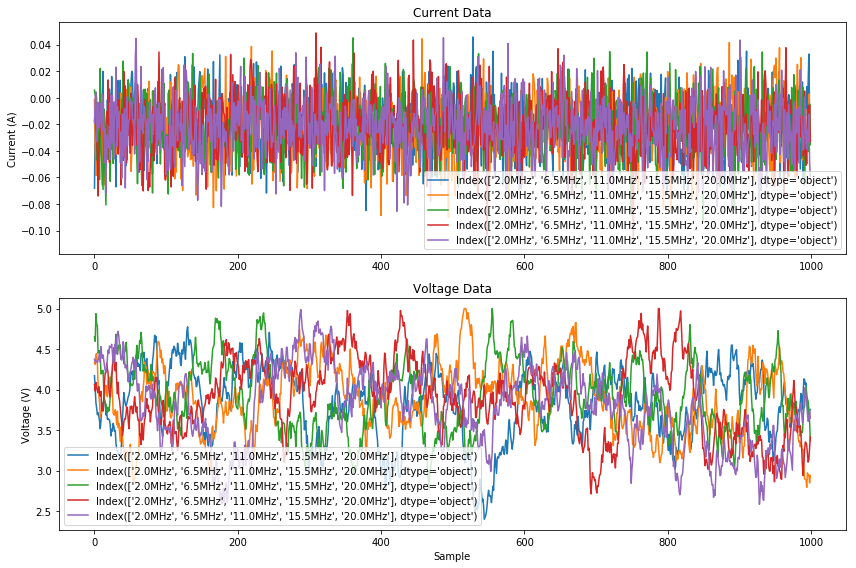

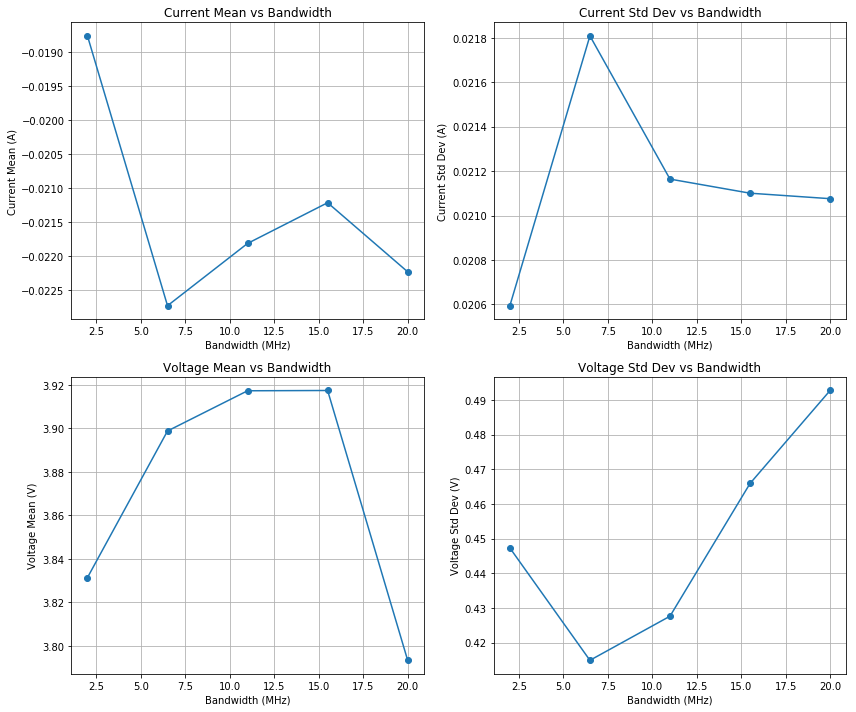

In [52]:
#Current, voltage TURNON plugIN ai5 connect to a resistor as well as plotting mean an std values

import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# Setup Noise Generator
rm = visa.ResourceManager()
gen = rm.open_resource('USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')
gen.write('*RST')
gen.write('OUTPut1:STATe On')
gen.write('FUNCtion NOIS')  # Set the generator to produce a noise waveform for each bandwidth

# Define bandwidth ranges
bandwidth_ranges = np.linspace(2e6, 20e6, 5)  # From 2 MHz to 20 MHz
current_df = pd.DataFrame()
voltage_df = pd.DataFrame()

# Lists to store mean and standard deviation
current_means = []
current_stds = []
voltage_means = []
voltage_stds = []

with nidaqmx.Task() as send_current, nidaqmx.Task() as send_voltage:
    # Setup current channel
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")
    send_current.timing.cfg_samp_clk_timing(rate=50000)

    # Setup voltage channel
    send_voltage.ai_channels.add_ai_voltage_chan("Dev4/ai5")
    send_voltage.timing.cfg_samp_clk_timing(rate=100000)

    for bandwidth in bandwidth_ranges:
        print(f"Testing with bandwidth: {bandwidth/1e6} MHz")
        time.sleep(1)  # Allow some time for the system to stabilize

        # Read current and voltage data
        current_data = send_current.read(number_of_samples_per_channel=20000)
        voltage_data = send_voltage.read(number_of_samples_per_channel=20000)

        current_df[f'{bandwidth/1e6}MHz'] = current_data
        voltage_df[f'{bandwidth/1e6}MHz'] = voltage_data

        # Calculate statistics for current
        current_mean = np.mean(current_data)
        current_std = np.std(current_data)
        current_means.append(current_mean)
        current_stds.append(current_std)
        print(f'Bandwidth: {bandwidth/1e6} MHz - Current Mean: {current_mean:.3f} A, Current Std Dev: {current_std:.3f} A')

        # Calculate statistics for voltage
        voltage_mean = np.mean(voltage_data)
        voltage_std = np.std(voltage_data)
        voltage_means.append(voltage_mean)
        voltage_stds.append(voltage_std)
        print(f'Bandwidth: {bandwidth/1e6} MHz - Voltage Mean: {voltage_mean:.3f} V, Voltage Std Dev: {voltage_std:.3f} V')

gen.write('OUTPut1:STATe Off')
gen.close()

# Plotting data
plt.figure(figsize=(12, 8))

# Plot Current DataFrame
plt.subplot(2, 1, 1)
plt.plot(current_df, label=current_df.columns)
plt.title('Current Data')
plt.ylabel('Current (A)')
plt.legend()

# Plot Voltage DataFrame
plt.subplot(2, 1, 2)
plt.plot(voltage_df, label=voltage_df.columns)
plt.title('Voltage Data')
plt.ylabel('Voltage (V)')
plt.xlabel('Sample')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting Mean and Standard Deviation
plt.figure(figsize=(12, 10))

# Plot Current Mean
plt.subplot(2, 2, 1)
plt.plot(bandwidth_ranges/1e6, current_means, marker='o', linestyle='-')
plt.title('Current Mean vs Bandwidth')
plt.xlabel('Bandwidth (MHz)')
plt.ylabel('Current Mean (A)')
plt.grid(True)

# Plot Current Std Dev
plt.subplot(2, 2, 2)
plt.plot(bandwidth_ranges/1e6, current_stds, marker='o', linestyle='-')
plt.title('Current Std Dev vs Bandwidth')
plt.xlabel('Bandwidth (MHz)')
plt.ylabel('Current Std Dev (A)')
plt.grid(True)

# Plot Voltage Mean
plt.subplot(2, 2, 3)
plt.plot(bandwidth_ranges/1e6, voltage_means, marker='o', linestyle='-')
plt.title('Voltage Mean vs Bandwidth')
plt.xlabel('Bandwidth (MHz)')
plt.ylabel('Voltage Mean (V)')
plt.grid(True)

# Plot Voltage Std Dev
plt.subplot(2, 2, 4)
plt.plot(bandwidth_ranges/1e6, voltage_stds, marker='o', linestyle='-')
plt.title('Voltage Std Dev vs Bandwidth')
plt.xlabel('Bandwidth (MHz)')
plt.ylabel('Voltage Std Dev (V)')
plt.grid(True)

plt.tight_layout()
plt.show()


Testing with bandwidth: 2.0 MHz
Bandwidth: 2.0 MHz - Current Mean: -0.019 A, Current Std Dev: 0.021 A
Bandwidth: 2.0 MHz - Voltage Mean: -0.007 V, Voltage Std Dev: 0.005 V


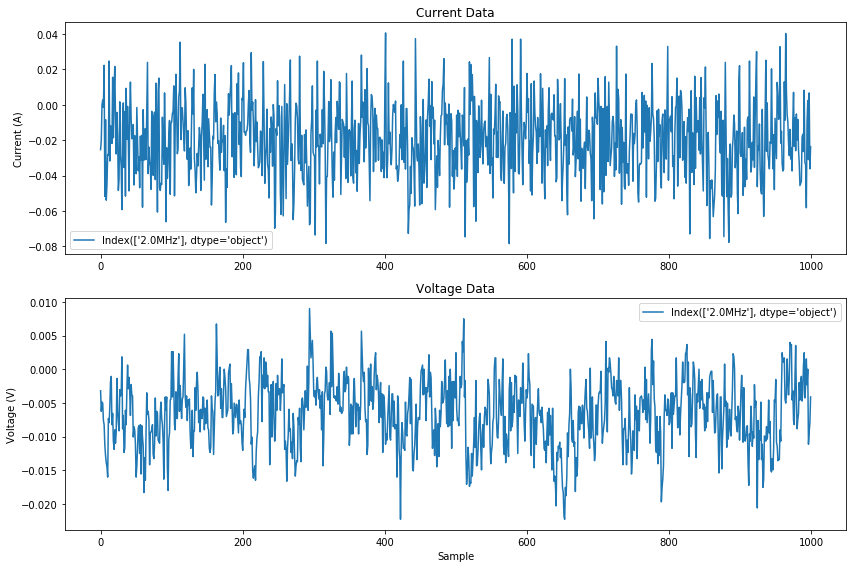

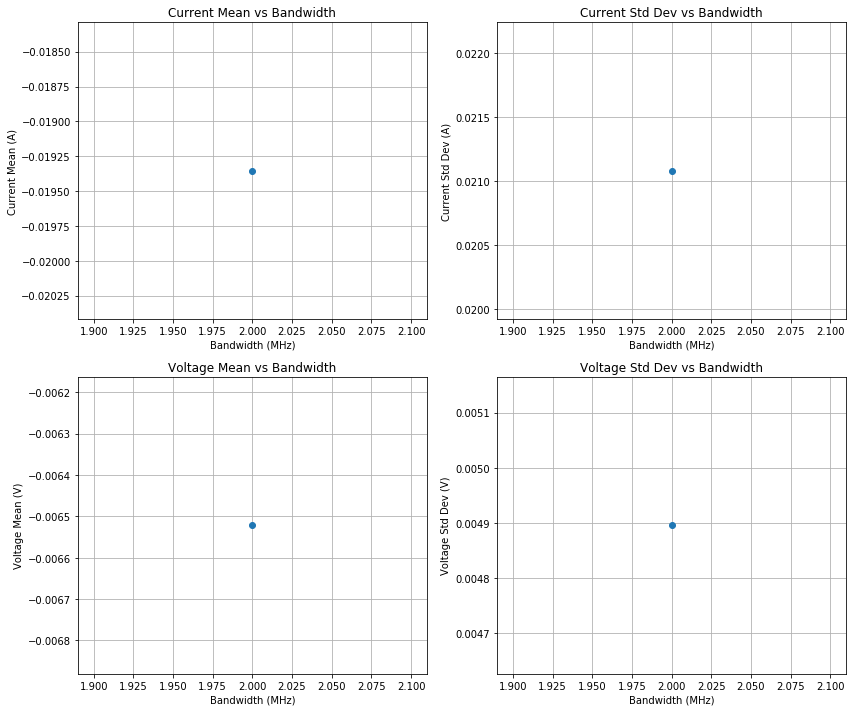

In [62]:
#Current, voltage TURNON plugIN ai5 connect to a JJ. plotting mean an std values

import numpy as np
import nidaqmx
import time
import pyvisa as visa
import matplotlib.pyplot as plt
import pandas as pd

# Setup Noise Generator
rm = visa.ResourceManager()
gen = rm.open_resource('USB0::0x1AB1::0x0642::DG1ZA241701602::INSTR')
gen.write('*RST')
gen.write('OUTPut1:STATe On')
gen.write('FUNCtion NOIS')  # Set the generator to produce a noise waveform for each bandwidth

# Define bandwidth ranges
bandwidth_ranges = np.linspace(2e6, 20e6, 1)  # From 2 MHz to 20 MHz
current_df = pd.DataFrame()
voltage_df = pd.DataFrame()

# Lists to store mean and standard deviation
current_means = []
current_stds = []
voltage_means = []
voltage_stds = []

with nidaqmx.Task() as send_current, nidaqmx.Task() as send_voltage:
    # Setup current channel
    send_current.ai_channels.add_ai_voltage_chan("Dev4/ai7")
    send_current.timing.cfg_samp_clk_timing(rate=50000)

    # Setup voltage channel
    send_voltage.ai_channels.add_ai_voltage_chan("Dev4/ai5")
    send_voltage.timing.cfg_samp_clk_timing(rate=100000)

    for bandwidth in bandwidth_ranges:
        print(f"Testing with bandwidth: {bandwidth/1e6} MHz")
        time.sleep(1)  # Allow some time for the system to stabilize

        # Read current and voltage data
        current_data = send_current.read(number_of_samples_per_channel=20000)
        voltage_data = send_voltage.read(number_of_samples_per_channel=20000)

        current_df[f'{bandwidth/1e6}MHz'] = current_data
        voltage_df[f'{bandwidth/1e6}MHz'] = voltage_data

        # Calculate statistics for current
        current_mean = np.mean(current_data)
        current_std = np.std(current_data)
        current_means.append(current_mean)
        current_stds.append(current_std)
        print(f'Bandwidth: {bandwidth/1e6} MHz - Current Mean: {current_mean:.3f} A, Current Std Dev: {current_std:.3f} A')

        # Calculate statistics for voltage
        voltage_mean = np.mean(voltage_data)
        voltage_std = np.std(voltage_data)
        voltage_means.append(voltage_mean)
        voltage_stds.append(voltage_std)
        print(f'Bandwidth: {bandwidth/1e6} MHz - Voltage Mean: {voltage_mean:.3f} V, Voltage Std Dev: {voltage_std:.3f} V')

gen.write('OUTPut1:STATe Off')
gen.close()

# Plotting data
plt.figure(figsize=(12, 8))

# Plot Current DataFrame
plt.subplot(2, 1, 1)
plt.plot(current_df, label=current_df.columns)
plt.title('Current Data')
plt.ylabel('Current (A)')
plt.legend()

# Plot Voltage DataFrame
plt.subplot(2, 1, 2)
plt.plot(voltage_df, label=voltage_df.columns)
plt.title('Voltage Data')
plt.ylabel('Voltage (V)')
plt.xlabel('Sample')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting Mean and Standard Deviation
plt.figure(figsize=(12, 10))

# Plot Current Mean
plt.subplot(2, 2, 1)
plt.plot(bandwidth_ranges/1e6, current_means, marker='o', linestyle='-')
plt.title('Current Mean vs Bandwidth')
plt.xlabel('Bandwidth (MHz)')
plt.ylabel('Current Mean (A)')
plt.grid(True)

# Plot Current Std Dev
plt.subplot(2, 2, 2)
plt.plot(bandwidth_ranges/1e6, current_stds, marker='o', linestyle='-')
plt.title('Current Std Dev vs Bandwidth')
plt.xlabel('Bandwidth (MHz)')
plt.ylabel('Current Std Dev (A)')
plt.grid(True)

# Plot Voltage Mean
plt.subplot(2, 2, 3)
plt.plot(bandwidth_ranges/1e6, voltage_means, marker='o', linestyle='-')
plt.title('Voltage Mean vs Bandwidth')
plt.xlabel('Bandwidth (MHz)')
plt.ylabel('Voltage Mean (V)')
plt.grid(True)

# Plot Voltage Std Dev
plt.subplot(2, 2, 4)
plt.plot(bandwidth_ranges/1e6, voltage_stds, marker='o', linestyle='-')
plt.title('Voltage Std Dev vs Bandwidth')
plt.xlabel('Bandwidth (MHz)')
plt.ylabel('Voltage Std Dev (V)')
plt.grid(True)

plt.tight_layout()
plt.show()
